In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle
from scipy.misc import imsave

In [11]:
calibration_data = pickle.load(open("calibration_data.p", "rb" ))
matrix = calibration_data['camera_matrix']
dist_coef = calibration_data['distortion_coefficient']

In [12]:
#TAKING THE BIRD EYE IMAGES#
images=[]
for i in range(1,4):
    images.append(plt.imread("output_images/lane"+str(i)+".jpg"))

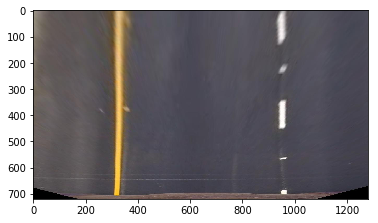

In [13]:
#DISPLAYING ONE OF THE IMAGES#
plt.imshow(images[0])

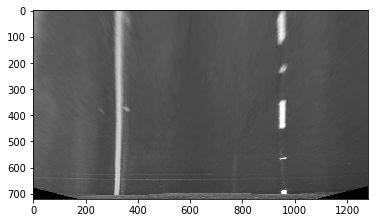

In [14]:
gray=[]
#CONVERTING THE IMAGES TO GRAY SCALE#
for image in images:
    gray.append(cv2.cvtColor(image,cv2.COLOR_RGB2GRAY))
plt.imshow(gray[0],cmap='gray')

In [15]:
#APPLYING SOBEL FILTRE#
sobel_x=[]
sobel_y=[]
for image in gray:
    sobel_x.append(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 5))
    sobel_y.append(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 5))

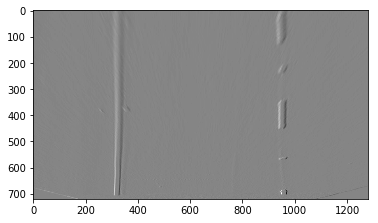

In [16]:
plt.imshow(sobel_x[0],cmap='gray')

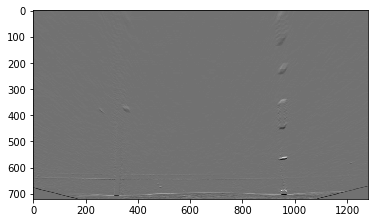

In [17]:
plt.imshow(sobel_y[0],cmap='gray')

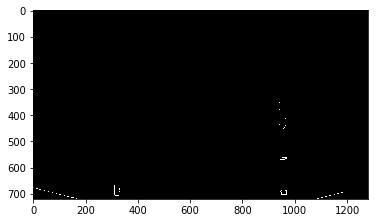

In [20]:
#CACULATING AND PLOTTING GRADIENT THRESHOLD#
mag = np.sqrt(np.square(sobel_x[0])+np.square(sobel_y[0]))
scaled_mag = np.uint8(255*mag/np.max(mag))
binary_output = np.zeros_like(scaled_mag)
binary_output[(scaled_mag >= 100) & (scaled_mag <= 255)] = 1
plt.imshow(binary_output,cmap='gray')

In [63]:
#THE MAGNITUDE THRESHOLD DOESN'T SEEM TO BE WORKING VERY NICELY,SO USING ONLY SOBEL_X FILTERS#
binary_oututs=[]
for image in sobel_x:
    #binary_output = np.zeros_like(image)
    #binary_output[(scaled_mag >= 50) & (scaled_mag <= 255)] = 1
    ret,thresh1 = cv2.threshold(image,250,255,cv2.THRESH_BINARY)
    binary_oututs.append(thresh1)
    

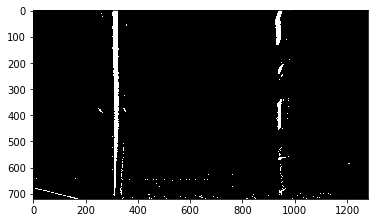

In [64]:
plt.imshow(binary_oututs[0],cmap='gray')

In [69]:
#SAVING THE IMAGE FOR FUTURE USE#
c=1
for image in binary_oututs:
    path =  "output_images/" + "threshold" +str(c)+ ".jpg"
    imsave(path,image)
    #imsave(path, cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))
    c=c+1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """
